In [ ]:
from google.colab import drive
drive.mount("/content/drive")

#to confirm gpu access
import tensorflow as tf
device_name=tf.test.gpu_device_name()
print(device_name)

Mounted at /content/drive



In [ ]:
!git clone "https://github.com/sydney-machine-learning/sentimentanalysis-Bible.git"

In [ ]:
!pip3 install afinn
from afinn import Afinn

In [ ]:
import os

In [ ]:
os.chdir("sentimentanalysis-Bible")

In [ ]:
afinn = Afinn(language='en')

In [ ]:
pos_index = []
neg_index = []
neutral_index = []
most_pos = []

In [ ]:
chapters = ["Chapter-5_cleaned", "Chapter-6_cleaned", "Chapter-7_cleaned"]
for i in range(3):
  chapter = open('New Revised Standard Version/'+ chapters[i] + '.txt')
  data = chapter.read()
  sentences = data.split('.')
  print(data)
  pos = 0
  neg = 0
  neutral = 0

  for sentence in sentences:
    score = int(afinn.score(sentence))

    if score>0:
      pos+=1
    elif score<0:
      neg+=1
    else:
      neutral+=1
  scored_sentences = ((afinn.score(sent), sent) for sent in sentences)
  sorted_sentences = sorted(scored_sentences)
  n = len(sentences)
  pos_index.append(pos/n)
  neg_index.append(neg/n)
  neutral_index.append(neutral/n)
  most_pos.append(sorted_sentences)

5 When Jesus saw the crowds, he went up the mountain; and after he sat down, his disciples came to him. 2 Then he began to speak, and taught them, saying:

3 ‘Blessed are the poor in spirit, for theirs is the kingdom of heaven.

4 ‘Blessed are those who mourn, for they will be comforted.

5 ‘Blessed are the meek, for they will inherit the earth.

6 ‘Blessed are those who hunger and thirst for righteousness, for they will be filled.

7 ‘Blessed are the merciful, for they will receive mercy.

8 ‘Blessed are the pure in heart, for they will see God.

9 ‘Blessed are the peacemakers, for they will be called children of God.

10 ‘Blessed are those who are persecuted for righteousness’ sake, for theirs is the kingdom of heaven.

11 ‘Blessed are you when people revile you and persecute you and utter all kinds of evil against you falsely on my account. 12 Rejoice and be glad, for your reward is great in heaven, for in the same way they persecuted the prophets who were before you.

13 ‘You are t

In [ ]:
pos_index

[0.4186046511627907, 0.6060606060606061, 0.22727272727272727]

In [ ]:
neg_index

[0.32558139534883723, 0.18181818181818182, 0.13636363636363635]

In [ ]:
neutral_index

[0.2558139534883721, 0.21212121212121213, 0.6363636363636364]

In [ ]:
most_pos

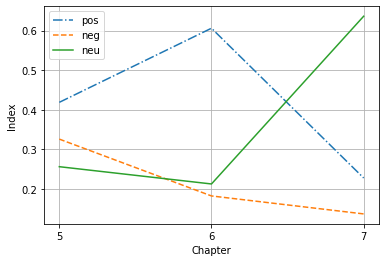

In [16]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(5,8)
plt.plot(X,pos_index,'-.',label='pos')
plt.plot(X,neg_index, '--',label='neg')
plt.plot(X,neutral_index,'-',label='neu')
plt.legend()
plt.xticks(X)
plt.xlabel('Chapter')
plt.ylabel('Index')
plt.grid()
plt.savefig('afinn-bsi.png')
plt.show()  

In [17]:
##imports
!pip install torch
import torch
import pandas as pd
# !pip install onnx
# import onnx
# !pip install onnx-tf
# from onnx_tf.backend import prepare

!pip install transformers==4.10

import transformers
from transformers import BertTokenizer, BertModel, BertConfig

import pandas as pd

import spacy
# spacy_en = spacy.load('en')
import re

from torch.utils.data import DataLoader

import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.8 MB 18.5 MB/s 
     |████████████████████████████████| 596 kB 58.2 MB/s 
     |████████████████████████████████| 101 kB 13.4 MB/s 
     |████████████████████████████████| 880 kB 59.8 MB/s 
     |████████████████████████████████| 3.3 MB 34.7 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=389c76eb43d23899df55eccbe6752c4274815f483b1e227b1343d79b890b81b7
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [18]:
PATH = "/content/drive/MyDrive/bertmodel.pth"

In [20]:
from google.colab import drive
drive.mount('/content/drive')
!pip freeze --local > /content/drive/My\ Drive/colab_installed.txt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
class BERT(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = transformers.BertModel.from_pretrained('bert-base-uncased')
        self.layer2 = torch.nn.Dropout(0.3)
        self.layer3 = torch.nn.Linear(768, 11)

    def forward(self, ids, mask, token_type_ids, return_dict = False):
        unw, out_1 = self.layer1(ids, attention_mask = mask, token_type_ids = token_type_ids)[0], self.layer1(ids, attention_mask = mask, token_type_ids = token_type_ids)[1]
        out_2 = self.layer2(out_1)
        out_final = self.layer3(out_2)
        return out_final

model = BERT()
model

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BERT(
  (layer1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
     

In [42]:
chapter5 = pd.read_csv("New International Version/Chapter-5_cleaned.csv")
chapter5.head(10)

,verse
0,now when jesus saw the crowds he went up on a ...
1,and he began to teach them. he said
2,blessed are the poor in spirit for theirs is t...
3,blessed are those who mourn for they will be c...
4,blessed are the meek for they will inherit the...
5,blessed are those who hunger and thirst for ri...
6,blessed are the merciful for they will be show...
7,blessed are the pure in heart for they will se...
8,blessed are the peacemakers for they will be c...
9,blessed are those who are persecuted because o...


In [43]:
ch5pos=[]
ch5neg=[]
ch5neutral=[]
ch5most_pos=[]

In [48]:
ch5_verses=chapter5['verse']

In [50]:
for i in range(len(ch5_verses)):
  verse = ch5_verses[i]
  sentences = verse.split('.')
  print(verse)
  pos = 0
  neg = 0
  neutral = 0

  for sentence in sentences:
    score = int(afinn.score(sentence))

    if score>0:
      pos+=1
    elif score<0:
      neg+=1
    else:
      neutral+=1
  scored_sentences = ((afinn.score(sent), sent) for sent in sentences)
  sorted_sentences = sorted(scored_sentences)
  n = len(sentences)
  ch5pos.append(pos/n)
  ch5neg.append(neg/n)
  ch5neutral.append(neutral/n)
  ch5most_pos.append(sorted_sentences)

now when jesus saw the crowds he went up on a mountainside and sat down. his disciples came to him
and he began to teach them. he said
blessed are the poor in spirit for theirs is the kingdom of heaven.
blessed are those who mourn for they will be comforted.
blessed are the meek for they will inherit the earth.
blessed are those who hunger and thirst for righteousness for they will be filled.
blessed are the merciful for they will be shown mercy.
blessed are the pure in heart for they will see god.
blessed are the peacemakers for they will be called children of god.
blessed are those who are persecuted because of righteousness for theirs is the kingdom of heaven.
blessed are you when people insult you persecute you and falsely say all kinds of evil against you because of me.
rejoice and be glad because great is your reward in heaven for in the same way they persecuted the prophets who were before you.
you are the salt of the earth. but if the salt loses its saltiness how can it be made

In [53]:
ch5most_pos

[[(0.0, ' his disciples came to him'),
  (1.0,
   'now when jesus saw the crowds he went up on a mountainside and sat down')],
 [(0.0, ' he said'), (0.0, 'and he began to teach them')],
 [(0.0, ''),
  (1.0, 'blessed are the poor in spirit for theirs is the kingdom of heaven')],
 [(-2.0, 'blessed are those who mourn for they will be comforted'), (0.0, '')],
 [(0.0, ''), (0.0, 'blessed are the meek for they will inherit the earth')],
 [(0.0, ''),
  (0.0,
   'blessed are those who hunger and thirst for righteousness for they will be filled')],
 [(0.0, ''), (2.0, 'blessed are the merciful for they will be shown mercy')],
 [(0.0, ''), (2.0, 'blessed are the pure in heart for they will see god')],
 [(0.0, ''),
  (1.0,
   'blessed are the peacemakers for they will be called children of god')],
 [(0.0, ''),
  (2.0,
   'blessed are those who are persecuted because of righteousness for theirs is the kingdom of heaven')],
 [(-9.0,
   'blessed are you when people insult you persecute you and false

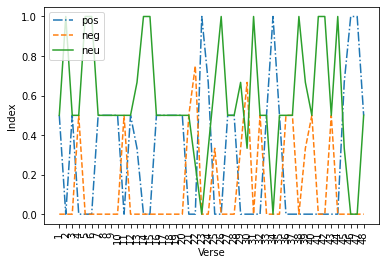

In [60]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(1,49)
plt.plot(X,ch5pos,'-.',label='pos')
plt.plot(X,ch5neg, '--',label='neg')
plt.plot(X,ch5neutral,'-',label='neu')
plt.legend()
plt.xticks(X,rotation=90)
plt.xlabel('Verse')
plt.ylabel('Index')
# plt.grid()
plt.savefig('afinn-bsi_ch5.png')
plt.show()  

In [59]:
!ls

 afinn-bsi.png		     'New Revised Standard Version'
 Chapter-5_furnished.txt      README.md
 Chapter-6_furnished.txt      Results
 Chapter-7_furnished.txt      Sermon_On_Mount_Sentiment_Analysis.ipynb
'King James Version'	      Steps.txt
'New International Version'   text_cleaning.py
